# Playground for Metrics (Regression)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# metrics
from sklearn.metrics import mean_absolute_error as mae_sklearn
from sklearn.metrics import mean_squared_error as mse_sklearn
from sklearn.metrics import r2_score as r2_sklearn
from sklearn.metrics import mean_squared_log_error as msle_sklearn

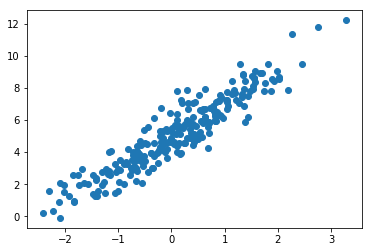

In [0]:
X = np.random.normal(size=250)
bias = np.random.normal(0, 0.75, size=250)
y = 2 * X + 5 + bias
plt.scatter(X, y);

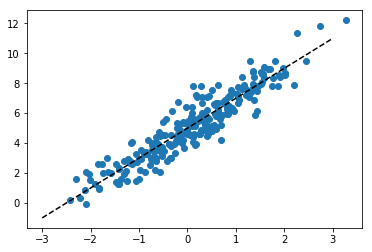

In [0]:
line = np.arange(-3, 3, 0.01)
regression = LinearRegression().fit(X.reshape(-1, 1), y)
plt.scatter(X, y)
plt.plot(line, regression.predict(line.reshape(-1, 1)), linestyle='--', c='k');

In [0]:
X_test = np.random.normal(size=250)
y_test = 2 * X + 5 + np.random.normal(0, 1, size=250)

X = np.random.normal(size=250)
y_pred = regression.predict(X_test.reshape(-1, 1))

## Mean Absolute Error

In [0]:
def mean_absolute_error(predictions, labels):

    """Calculate Mean Absolute Error between predictions and labels

    Parameters:
    ----------

    predictions : array-like
    The predictions of an estimator

    labels : array-like
    The true labels of data

    Raise:
    -----

    ValueError: raise value error when the length of predictions and labels are not the same

    """


    if len(predictions) == len(labels):
        return np.sum(np.abs(predictions - labels)) / len(labels)
    else:
        raise ValueError("The length of predictions and labels are not the same")

In [0]:
mae = mean_absolute_error(y_pred, y_test)
sk_mae = mae_sklearn(y_test, y_pred)
print(mae)
print(sk_mae)

2.367915001555131
2.367915001555131


## Mean Absolute Percentage Error

In [0]:
def mean_absolute_percentage_error(predictions, labels):

    """Calculate Mean Absolute Percentage Error between predictions and labels.
    It will be problematic if some elements inside labels are zero.

    Parameters:
    ----------

    predictions : array-like
    The predictions of an estimator

    labels : array-like
    The true labels of data

    Raise:
    -----

    ValueError: get raised when the length of predictions and labels are not the same

    ZeroDivisionError : get raised when some of the labels contain zero

    """


    if len(predictions) == len(labels):
        return np.sum(np.abs((labels - predictions) / labels)) * (100 / len(predictions))
    else:
        raise ValueError("The length of predictions and labels are not the same")

## Mean Squared Error

In [0]:
def mean_squared_error(predictions, labels):

    """Calculate Mean Squared Error between predictions and labels.

    Parameters:
    ----------

    predictions : array-like
    The predictions of an estimator

    labels : array-like
    The true labels of data

    Raise:
    -----

    ValueError: get raised when the length of predictions and labels are not the same

    """


    if len(predictions) == len(labels):
        return np.sum(np.power(labels - predictions, 2)) / len(predictions)
    else:
        raise ValueError("The length of predictions and labels are not the same")

In [0]:
mse = mean_squared_error(y_pred, y_test)
sk_mse = mse_sklearn(y_test, y_pred)
print(mse)
print(sk_mse)

9.158925854140378
9.158925854140378


## Root Mean Square Error

In [0]:
def root_mean_square_error(predictions, labels):

    """Calculate Mean Squared Error between predictions and labels.

    Parameters:
    ----------

    predictions : array-like
    The predictions of an estimator

    labels : array-like
    The true labels of data

    Raise:
    -----

    ValueError: get raised when the length of predictions and labels are not the same

    """
    

    if len(predictions) == len(labels):
        return np.sqrt(np.sum(np.power(labels - predictions, 2)) / len(predictions))
    else:
        raise ValueError("The length of predictions and labels are not the same")

In [0]:
rmse = root_mean_square_error(y_pred, y_test)
print(rmse)

3.026371730990821


## R-Squared Score

In [0]:
def r2_score(predictions, labels):

    """Calculate R-Squared (Coefficients of Determination) between predictions and labels.

    Parameters:
    ----------

    predictions : array-like
    The predictions of an estimator

    labels : array-like
    The true labels of data

    Raise:
    -----

    ValueError: get raised when the length of predictions and labels are not the same

    """
    
    
    if len(predictions) == len(labels):
        ybar = np.mean(labels)
        sres = np.sum(np.power(labels - predictions, 2))
        stot = np.sum(np.power(labels - ybar, 2))
        return 1 - (sres / stot)
    else:
        raise ValueError("The length of predictions and labels are not the same")

In [0]:
my_score = r2_score(y_pred, y_test)
sk_score = r2_sklearn(y_test, y_pred)
print(my_score)
print(sk_score)

-0.6938048038710445
-0.6938048038710445


## Adjusted R-Squared Score

In [0]:
def adjusted_r2_score(predictions, labels, num_features):

    """Calculate R-Squared (Coefficients of Determination) between predictions and labels.

    Parameters:
    ----------

    predictions : array-like
    The predictions of an estimator

    labels : array-like
    The true labels of data

    Raise:
    -----

    ValueError: get raised when the length of predictions and labels are not the same

    """
    

    def r2_score(predictions, labels):
        if len(predictions) == len(labels):
            ybar = np.mean(labels)
            sres = np.sum(np.power(labels - predictions, 2))
            stot = np.sum(np.power(labels - ybar, 2))
            return 1 - (sres / stot)
        else:
            raise ValueError("The length of predictions and labels are not the same")

    r2 = r2_score(predictions, labels)
    n = len(predictions)
    k = num_features
    cons = (n - 1) / (n - (k + 1))
    return 1 - (1 - r2)*cons

In [0]:
ajd_r2_score = adjusted_r2_score(y_pred, y_test, 1)
print(ajd_r2_score)

-0.7006346619511699


## Mean Squared Logarithmic Error

In [0]:
def mean_squared_log_error(predictions, labels):

    """Calculate Mean Squared Logarithmic Error between predictions and labels.

    Parameters:
    ----------

    predictions : array-like
    The predictions of an estimator

    labels : array-like
    The true labels of data

    Raise:
    -----

    ValueError: 
        Get raised when the length of predictions and labels are not the same or \
        when the predictions or labels contain negative values.

    """

    if len(predictions) == len(labels):
        if (predictions < 0).any() or (labels < 0).any():
            raise ValueError("Mean Squared Logarithmic Error cannot be used when targets contain negative values")
        else:
            log_labels = np.log(1 + labels)
            log_preds = np.log(1 + predictions)
            return np.sum(np.power(log_labels - log_preds, 2)) / len(predictions)
    else:
        raise ValueError("The length of predictions and labels are not the same")

In [0]:
# my_error = mean_squared_log_error(y_pred, y_test)
# sk_error = msle_sklearn(y_test, y_pred)

## Max Error

In [0]:
def max_error(predictions, labels):

    """Calculate the maximum residual error (absolute) between predictions and labels.

    Parameters:
    ----------

    predictions : array-like
    The predictions of an estimator

    labels : array-like
    The true labels of data

    Raise:
    -----

    ValueError: get raised when the length of predictions and labels are not the same

    """

    if len(predictions) == len(labels):
        return np.max(np.abs(labels - predictions))
    else:
        raise ValueError("The length of predictions and labels are not the same")


In [0]:
error = max_error(y_pred, y_test)
print(error)

12.025595716111106


---